# Assigment 1

## Problem 1: Investigation of Life Expectancy

Import data from `Life Expectancy Data.csv` and drop the column `Country`.

In [1]:
data = read.csv('Life Expectancy Data.csv')
data = na.omit(subset(data, select = -c(Country)))

Fit linear regression models

In [2]:
full_mod = lm('Life.expectancy ~ .',data)

### 1. Report the summary of the linear model. 

What are the predicting variables actually affecting the life expectancy? Justify your answer based on the outputs of linear regression model.

In [3]:
summary(full_mod)


Call:
lm(formula = "Life.expectancy ~ .", data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7681  -2.1427   0.0273   2.1776  12.4242 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.090e+02  4.621e+01   6.687 3.12e-11 ***
Year                            -1.272e-01  2.308e-02  -5.510 4.18e-08 ***
StatusDeveloping                -8.865e-01  3.353e-01  -2.644  0.00827 ** 
Adult.Mortality                 -1.621e-02  9.441e-04 -17.171  < 2e-16 ***
infant.deaths                    8.873e-02  1.059e-02   8.376  < 2e-16 ***
Alcohol                         -1.313e-01  3.366e-02  -3.901 9.95e-05 ***
percentage.expenditure           3.026e-04  1.789e-04   1.691  0.09096 .  
Hepatitis.B                     -3.258e-03  4.449e-03  -0.732  0.46413    
Measles                         -1.033e-05  1.070e-05  -0.966  0.33439    
BMI                              3.183e-02  5.955e-03   5.345 1.03e-07 ***


From the summary of the linear model, the Year,Status,Adult Mortality,Infant, deaths,Alcohol,BMI,under-five deaths,HIV/AIDS,Income composition of resources,Schooling, these variables actually affecting the life expectancy.

### 2. Construct the 95% confidence intervals for the coefficient of “Adult Mortality” and “HIV/AIDS”.
Are you confident that these predictors have negative impact on the life expectancy? Explain why.

In [4]:
confint(full_mod,c("Adult.Mortality","HIV.AIDS"))

,2.5 %,97.5 %
Adult.Mortality,-0.01806251,-0.01435896
HIV.AIDS,-0.48296446,-0.41314512


The answer is Yes. The “Adult Mortality” and “HIV/AIDS” have negative impact on the life expectancy. Since the confidence intervals don't cross zero and these prodictors are significant according to the p-value. 

### 3. Construct the 97% confidence intervals for the coefficient of “Schooling” and “Alcohol”. 
Explain how these predictors impact the life expectancy.

In [5]:
confint(full_mod,c("Schooling","Alcohol"),level=0.97)

,1.5 %,98.5 %
Schooling,0.7665181,1.02324749
Alcohol,-0.2044186,-0.05820994


`Schooling` has positive impact on life expectancy, since it's confidence interval is positive.

`Alcohol` has negative impact on life expectancy, since it's confidence interval is negative.

## 4. Based on the p-values, which are the top-seven most influential predictors?
Use these predictors to fit a smaller model and report the summary.

From the summary of "big" model, the `Year`,`Adult.Mortality`,`infant.deaths`,`under.five.deaths`,`HIV.AIDS`,`Income.composition.of.resources` and `Schooling` are the top-seven most influential predictors.

In [6]:
small_mod = lm('Life.expectancy~Year+Adult.Mortality+infant.deaths+under.five.deaths+HIV.AIDS+Income.composition.of.resources+Schooling',data)

In [7]:
summary(small_mod)


Call:
lm(formula = "Life.expectancy~Year+Adult.Mortality+infant.deaths+under.five.deaths+HIV.AIDS+Income.composition.of.resources+Schooling", 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4354  -2.1962   0.0252   2.2574  13.0385 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      2.855e+02  4.550e+01   6.275 4.46e-10 ***
Year                            -1.158e-01  2.269e-02  -5.105 3.69e-07 ***
Adult.Mortality                 -1.812e-02  9.615e-04 -18.845  < 2e-16 ***
infant.deaths                    8.706e-02  9.897e-03   8.796  < 2e-16 ***
under.five.deaths               -6.746e-02  7.356e-03  -9.171  < 2e-16 ***
HIV.AIDS                        -4.498e-01  1.827e-02 -24.615  < 2e-16 ***
Income.composition.of.resources  1.191e+01  8.249e-01  14.440  < 2e-16 ***
Schooling                        1.063e+00  5.403e-02  19.677  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '

### 5. Use the smaller model to predict the life expectancy if a new observation is given with

Year=2008, Status=Developed, Adult Mortality=125, infant deaths=94, Alcohol=4.1, percentage expenditure=100, Hepatitis B=20, Measles=13, BMI=55, under-five deaths=2, Polio=12, Total expenditure=5.9, Diphtheria=12,HIV/AIDS=0.5, GDP=5892,Population=1.34 ×106, Income composition of resources=0.9, Schooling=18.

Report the 99% confidence interval for your prediction.

In [8]:
newdata = data.frame(Year=2008,Adult.Mortality=125,infant.deaths=94,under.five.deaths=2,HIV.AIDS=0.5,Income.composition.of.resources=0.9,Schooling=18)
predict(small_mod,newdata,interval="confidence",level=0.99)

,fit,lwr,upr
1,88.38095,85.99266,90.76924


### 6. Use AIC to compare the full model and the smaller model.

In [9]:
AIC(full_mod)

[1] 8886.484

In [10]:
AIC(small_mod)

[1] 9004.562

The AIC of full model is smaller than smaller model, so the full model is perferred that smaller model. 

## Problem 2 : Predicting Breast Cancer

First of all, preprocess the data by replacing na with columns average with Python.

Meanwhile, also drop the feature "Id", since it is clear that "Id" won't have any influence on result.

```python
import pandas as pd

target_name = './BreastCancer_train'

df = pd.read_csv(f'{target_name}.csv')
df.drop(columns=['Id'],inplace=True)
df.fillna(value=df[df.columns[:-1]].mean(),inplace=True)
df.to_csv(f'{target_name}_preprocessed.csv',index=False)
```

Output as "BreastCancer_train_preprocessed.csv"

In [11]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.0.5"


Import data from BreastCancer_train_preprocessed.csv 

In [12]:
train.data = read.csv("BreastCancer_train_preprocessed.csv")
test.data = read.csv("BreastCancer_test_preprocessed.csv")

Set 'malignant' to 1 and 'benign' to zero.

In [13]:
train.data$Class=train.data$Class=='malignant'
test.data$Class=test.data$Class=='malignant'

## 1. Use all the predictors to fit a logistic regression model and report the summary. Plot the ROC curve on the test dataset.

In [14]:
log.full.mod = glm(Class~.,family="binomial",data=train.data)

summary(log.full.mod)


Call:
glm(formula = Class ~ ., family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3083  -0.0848  -0.0536   0.0201   1.8751  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -10.6454     1.7181  -6.196 5.79e-10 ***
Cl.thickness      0.3729     0.2165   1.723   0.0849 .  
Cell.size        -0.2873     0.2781  -1.033   0.3015    
Cell.shape        0.5689     0.3091   1.841   0.0657 .  
Marg.adhesion     0.3514     0.1414   2.485   0.0130 *  
Epith.c.size      0.4082     0.2642   1.545   0.1223    
Bare.nuclei       0.2915     0.1216   2.397   0.0165 *  
Bl.cromatin       0.6153     0.2631   2.339   0.0193 *  
Normal.nucleoli   0.2043     0.1626   1.257   0.2089    
Mitoses           0.3156     0.4106   0.769   0.4421    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 514.144  on 399  degrees of

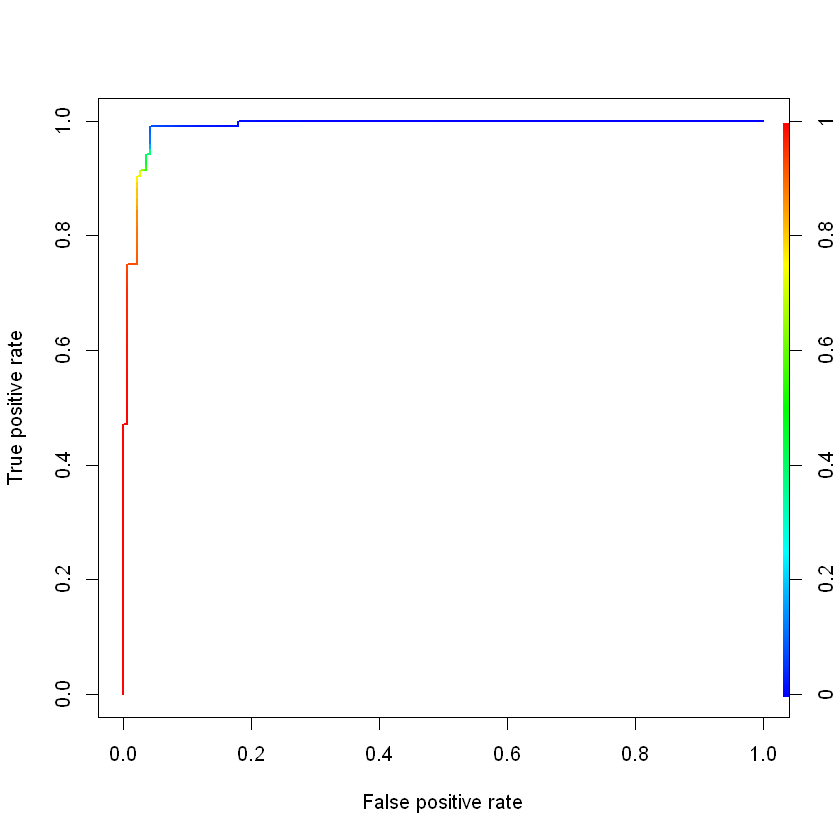

In [15]:
pred = predict(log.full.mod,test.data,type="response")
log.full.pred = prediction(pred,test.data$Class)
roc = performance(log.full.pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)

In [16]:
auc = performance(log.full.pred,"auc")@y.values[[1]]
auc

[1] 0.9904339

## 2. Use the predictors Cl.thickness, Cell.shape, Marg.adhesion, Bare.nuclei, Bl.cromatin to fit a logistic model and report the summary. Plot the ROC curve on the test dataset.

In [17]:
log.sm.mod = glm(Class~Cl.thickness+Cell.shape+Marg.adhesion+Bare.nuclei+Bl.cromatin,family="binomial",data=train.data)

summary(log.sm.mod)


Call:
glm(formula = Class ~ Cl.thickness + Cell.shape + Marg.adhesion + 
    Bare.nuclei + Bl.cromatin, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2436  -0.1051  -0.0561   0.0229   1.9158  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -9.8337     1.4964  -6.572 4.98e-11 ***
Cl.thickness    0.4902     0.1938   2.530 0.011416 *  
Cell.shape      0.4991     0.1998   2.498 0.012478 *  
Marg.adhesion   0.3544     0.1237   2.864 0.004181 ** 
Bare.nuclei     0.2905     0.1078   2.694 0.007065 ** 
Bl.cromatin     0.7664     0.2300   3.332 0.000861 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 514.144  on 399  degrees of freedom
Residual deviance:  61.572  on 394  degrees of freedom
AIC: 73.572

Number of Fisher Scoring iterations: 8


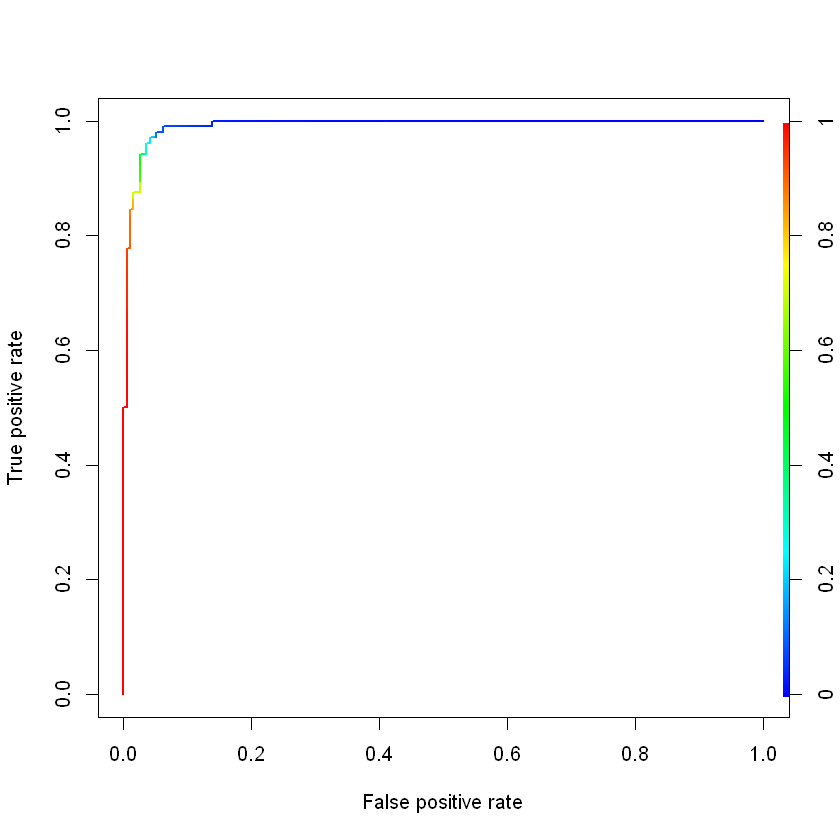

In [18]:
pred = predict(log.sm.mod,test.data,type="response")
log.sm.pred = prediction(pred,test.data$Class)
roc = performance(log.sm.pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)

In [19]:
auc = performance(log.sm.pred,"auc")@y.values[[1]]
auc

[1] 0.9922091

## 3. Use all the predictors to fit an LDA model and report the summary. Plot the ROC curve on the test dataset.

In [20]:
library(MASS)

In [21]:
lda.full.mod=lda(Class~.,data=train.data) 
lda.full.mod

Call:
lda(Class ~ ., data = train.data)

Prior probabilities of groups:
 FALSE   TRUE 
0.6575 0.3425 

Group means:
      Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
FALSE     2.859316  1.273764   1.384030      1.296578     2.091255    1.399104
TRUE      7.124088  6.678832   6.627737      5.751825     5.321168    7.726762
      Bl.cromatin Normal.nucleoli  Mitoses
FALSE    2.030418        1.231939 1.064639
TRUE     6.262774        6.204380 2.773723

Coefficients of linear discriminants:
                        LD1
Cl.thickness     0.15868777
Cell.size        0.08493867
Cell.shape       0.11582336
Marg.adhesion    0.08586815
Epith.c.size     0.12495092
Bare.nuclei      0.24317710
Bl.cromatin      0.11974025
Normal.nucleoli  0.10889167
Mitoses         -0.03055314

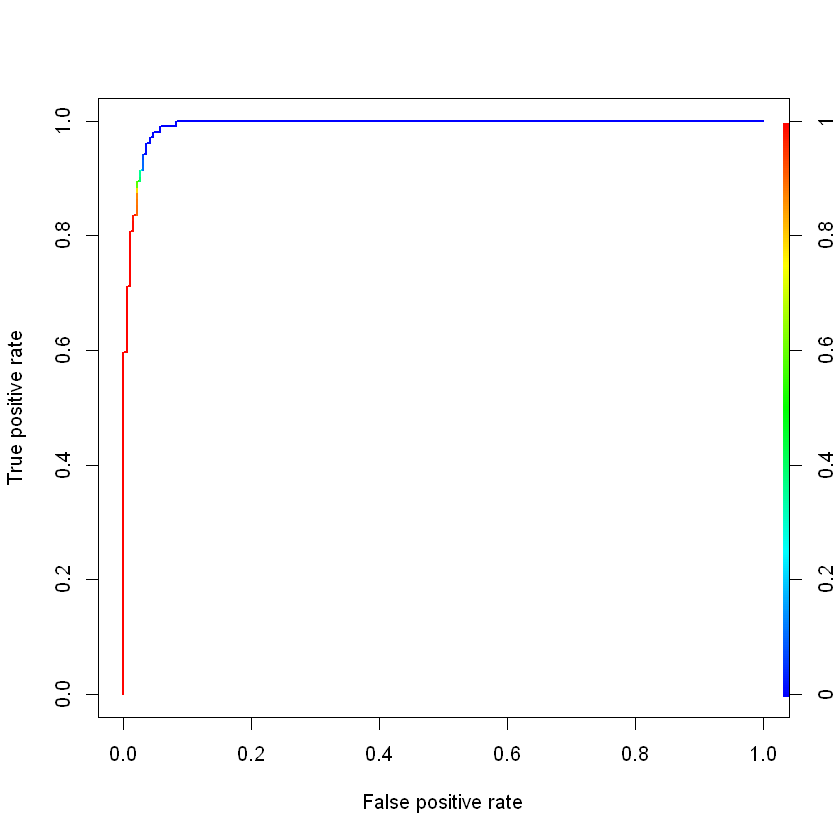

In [22]:
pred = predict(lda.full.mod,test.data,type="response")
lda.full.pred = prediction(pred$posterior[,2],test.data$Class)
roc = performance(lda.full.pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)

In [23]:
auc = performance(lda.full.pred,"auc")@y.values[[1]]
auc

[1] 0.9925542

## 4. Use the predictors Cl.thickness, Cell.shape, Marg.adhesion, Bare.nuclei, Bl.cromatin to fit an LDA model and report the summary. Plot the ROC curve on the test dataset.

In [24]:
lda.sm.mod=lda(Class~Cl.thickness+Cell.shape+Marg.adhesion+Bare.nuclei+Bl.cromatin,data=train.data) 
lda.sm.mod

Call:
lda(Class ~ Cl.thickness + Cell.shape + Marg.adhesion + Bare.nuclei + 
    Bl.cromatin, data = train.data)

Prior probabilities of groups:
 FALSE   TRUE 
0.6575 0.3425 

Group means:
      Cl.thickness Cell.shape Marg.adhesion Bare.nuclei Bl.cromatin
FALSE     2.859316   1.384030      1.296578    1.399104    2.030418
TRUE      7.124088   6.627737      5.751825    7.726762    6.262774

Coefficients of linear discriminants:
                    LD1
Cl.thickness  0.1663488
Cell.shape    0.2438485
Marg.adhesion 0.1108034
Bare.nuclei   0.2342889
Bl.cromatin   0.1925606

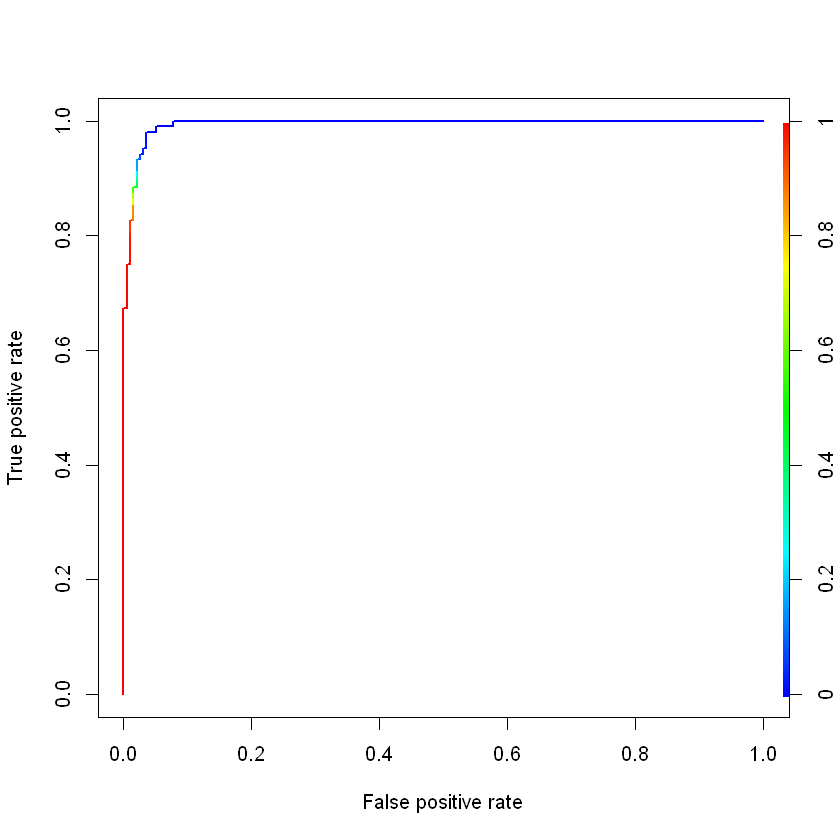

In [25]:
pred = predict(lda.sm.mod,test.data,type="response")
lda.sm.pred = prediction(pred$posterior[,2],test.data$Class)
roc = performance(lda.sm.pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)

In [26]:
auc = performance(lda.sm.pred,"auc")@y.values[[1]]
auc

[1] 0.9941321

## 5.Use all the predictors to fit a QDA model and report the summary. Plot the ROC curve on the test dataset.

In [27]:
qda.full.mod=qda(Class~.,data=train.data) 
qda.full.mod

Call:
qda(Class ~ ., data = train.data)

Prior probabilities of groups:
 FALSE   TRUE 
0.6575 0.3425 

Group means:
      Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
FALSE     2.859316  1.273764   1.384030      1.296578     2.091255    1.399104
TRUE      7.124088  6.678832   6.627737      5.751825     5.321168    7.726762
      Bl.cromatin Normal.nucleoli  Mitoses
FALSE    2.030418        1.231939 1.064639
TRUE     6.262774        6.204380 2.773723

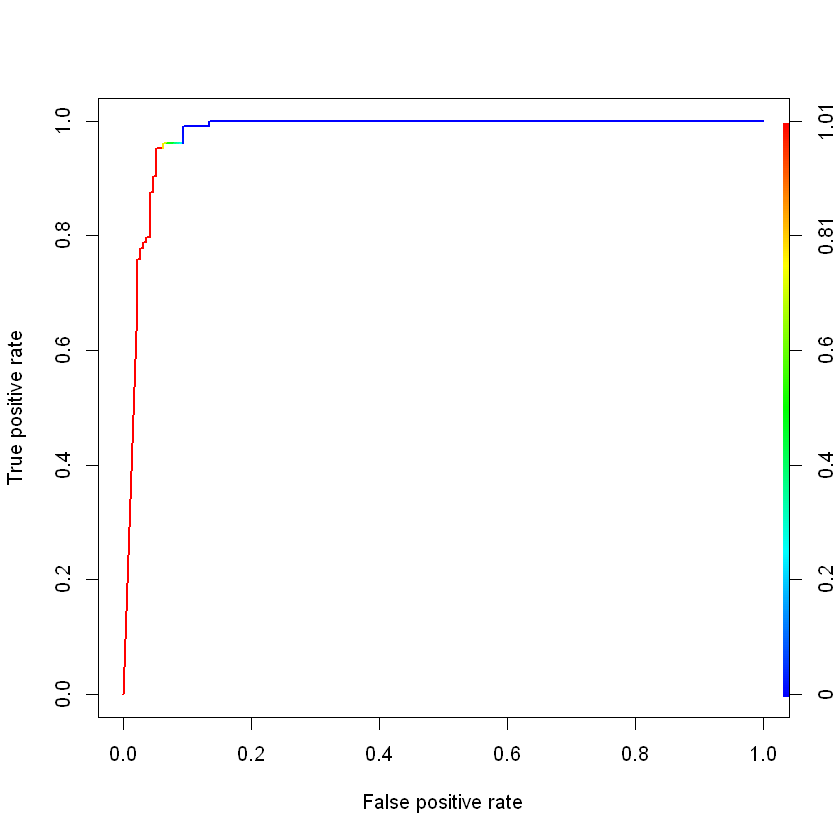

In [28]:
pred = predict(qda.full.mod,test.data,type="response")
qda.full.pred = prediction(pred$posterior[,2],test.data$Class)
roc = performance(qda.full.pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)

In [29]:
auc = performance(qda.full.pred,"auc")@y.values[[1]]
auc

[1] 0.9787968

## 6. Compare all the above models by AUC.

All AUC of each Models are summerized as following table.

| Model                                     | AUC              |
| ----------------------------------------- | ---------------- |
| Logistic Regression(All predictors)       | 0.99043392504931 |
| Logistic Regression(Specified predictors) | 0.99220907297830 |
| LDA(All predictors)                       | 0.99255424063116 |
| LDA(Specified predictors)                 | 0.99413214990138 |
| QDA(All predictors)                       | 0.97879684418146 |

From this table, we can see LDA(Specified predictors) model has the biggest AUC value comparing with other model.